<font size='10' color = 'E3A440'>**Pre-confèrence Workshop on Python**</font>
=======

<font color = 'E3A440'>*Pratical introduction to the analysis of unstructured data*</font>
=============

This tutorial is a short hands-on workshop to introduce the analysis of unstructured data for innovation studies. 

Structure of the workshop:
1. Presentation of sections 1 and 2 in a plenary mode (20 minutes)
2. Individual work on sections 2 and 3 (20 minutes)
3. Group work on section 3 (60 minutes)
4. Plenary section with the group presentation (20 minutes)

This tutorial cannot be considered exhaustive of the domain. 

### Auteurs: 
- Mikael Heroux-Vaillancourt <mikael.heroux-vaillancourt@polymtl.ca>
- Davide Pulizzotto <davide.pulizzotto@polymtl.ca>
- Pietro Cruciata <pietro.cruciata@polymtl.ca>
- Alvar Herrera <alvar.herrera@polymtl.ca> 

### Table des matières

- [Section 0. Introduction](#introduction)
- [Section 1. Preparation of data](#pre-processing)
- [Section 2. Descriptive statistics](#desc-stat)
- [Section 3. Analysis](#analysis)
- [Section 4. Conclusions](#concluding-remarks)

<a id='introduction'></a>
# <font size = '6' color='E3A440'>Section 0. Introduction</font>

This workshop is based on the research work of **Mikael Heroux-Vaillancourt** presented at the [P4IE Conference - Measuring Metrics that Matter](https://event.fourwaves.com/p4ie/pages), which will take place  on -10-11 May 2022 at the *Hilton Garden Inn*, in Ottawa.

Here the [link]() to get more information on the presentation.

In order to succeed in this workshop, a few concept have to be underlined:

1. This study is an exploratory analysis of several companies which obtained a [BCorp certification](https://www.bcorporation.net/en-us/)
2. The data analyzed come from a web scraping step of the snapshots found on [Wayback Machine](https://archive.org/web/) of all those companis of point 1.
3. Objectives are ...
To


### Glossary of the workshop

Here, we list some terms that are used in this workshop:

1. <font color='E3A440'><b>Dataframe</b></font>: a data structure that organizes data into a 2-dimensional table of rows and columns
2. <font color='E3A440'><b>Metadata</b></font>: it is an information about an unstructured block of data (i.e., the author of a paper is a metadata of the text of that paper).
3. <font color='E3A440'><b>Token</b></font>: each sequence of character which constitue an indipendent linguistic unit, that is a word (i.e., each occurence of the verb eat is a different token).
4. <font color='E3A440'><b>Type</b></font>: The unique string of caracter which represent several occurrences of the same linguistic unit or word (i.e., the string 'eat' is the type for each token of the verb to eat).
5. <font color='E3A440'><b>POS tag</b></font>:  a process which aims to assign parts of speech to each word of a given text
6. <font color='E3A440'><b>Stopwords</b></font>: it refers to words that are very low semantic content such as article (the, an), modals (would, must), etc. 
7. <font color='E3A440'><b>Lemmatization</b></font>: a process that reduces the inflected words properly ensuring that the root word belongs to the language
8. <font color='E3A440'><b>Document-Term matrix</b></font>: it is a matrix where rows represent segment of text and columns are filled by linguistic features of that segment of text.
9. <font color='E3A440'><b>Weighting</b></font>: it is the weigth a mathematical function provides for each linguistic feature of each segment of text (i.e., Term frequency, Tf-Idf, BM25, etc.)
10. <font color='E3A440'><b>K-means clustering</b></font>: an unsupervised statistic method aiming to partition *n* observations into *k* clusters based on their proximity to the centroid


### Some basic concepts
The main step in text mining is to convert unstructured textual data into a mathematical model to be used in statistical learning. Thus, we need to create a <font color='E3A440'>**Document-Term matrix**</font>, a matrix $n \times w$, where $n$ is the number of text segments and $w$ is the number of textual features selected.The textual feature can have different nature. In the most simple model, these features correspond to the set of types that resume each token of the corpus. In other terms, $w$ is the number of features that characterize a segment of text The matrix is generally represented as follow:  
 
$$X = \begin{bmatrix} 
x_{11} & x_{12} & \ldots & x_{1w} \\
\vdots & \vdots       &  \ddots      & \vdots \\ 
x_{n1} & x_{12} & \ldots & x_{nw} \\
\end{bmatrix}
$$ 
 
\\
When we apply a <font color='E3A440'>**clustering algorithm**</font> to this matrix, we want to group rows in a homogeneous set of clusters. This means to minimize the intra-class inertia or the pairwise squared deviations of points in the same cluster:

$$ \underset{s}{\arg\min}\sum_{i=1}^{k}\frac{1}{\vert S_i\vert}\sum_\limits{x,y \in S_i}\Vert x-y \Vert^2$$

This kind of algorithms aim to create a vector $Y$ of size $n$, containing the <font color='E3A440'>**cluster label**</font> assigned to each segment of text from $1$ to $k$.

$$
Y = \begin{bmatrix} 
c_1 \\
c_2 \\
\vdots \\ 
c_n
\end{bmatrix}$$

Thus, $Y_1$ correspond to the cluster label given at $X_1$. Generally, $k$ is the main parameters of a clustering algorithm, which represent the number of cluster into which group text segments.

## 0.1 Preparation of Colab Virtual Machine

In order to work correctly on Colab, we need to prepare the environment by executing two main steps:
1. Download data from the GitHub project 
2. Install package to run code of this workshop

In [ ]:
# Downloading of data from the GitHub project
!rm -rf TEST_PRECONFERENCE/
!git clone https://github.com/puli83/TEST_PRECONFERENCE

Cloning into 'TEST_PRECONFERENCE'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 385 (delta 46), reused 116 (delta 35), pack-reused 252
Receiving objects: 100% (385/385), 76.01 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (184/184), done.


In [ ]:
# Installation of packages
!pip install pickle5
!pip install nltk
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 256 kB 10.3 MB/s 
     |████████████████████████████████| 12.0 MB 12.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


## 0.2 Import packages

We import the following packages that contain the functions needed to accomplish our task: 
- `re` une librairie pour les expressions régulières
- `matplotlib` pour tracer des graphiques
- `numpy` pour des fonctions d'algèbre linéaire
- `pandas` pour manipuler les données
- `sklearn` (scikit-learn) pour des modèles d'apprentissage automatique ainsi que des fonctions reliées à la pratique de l'apprentissage automatique
- `spacy` designed to build information extraction or natural language understanding systems. It supports several functions to performs several NLP task such us POS tag and NER
- `nltk` include over 50 corpora, access to lexical resources such as WordNet and function to perform text processing task as tokenization, tagging and parsing 

In [ ]:
import pandas as pd
import numpy as np
import scipy
import datetime
import time
import os
import pickle5 as pickle
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer #, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

## 0.3 Definition of custom functions
In the next chunk of code, we define the functions that we need to reach the goal of the workshop. These functions will not be explained in details since they are not essenctial to accomplish the workshop.

In [ ]:
def prepare_data_for_WC(DTM, vocabulary_dtm):
    # compute total frequency for each word
    values_words = sum(DTM)
    #values_words = sum(tfidf_matrix)
    # verify type result and prepare data for wordcloud
    if type(values_words) is np.ndarray:
        values_words = [float(value) for value in np.nditer(values_words)]
    elif type(values_words) is scipy.sparse.csr.csr_matrix:
        values_words = [float(value) for value in np.nditer(values_words.todense())]
    else:
        print("Matrix in argument DTM has to be one of these two data classes:  'scipy.sparse.csr.csr_matrix' or 'numpy.ndarray'")
    ##
    list_mots = sorted(vocabulary_dtm.items(), key= lambda x:x[1])
    list_mots = [word for (word,idx) in  list_mots]
    words = zip(list_mots, values_words)
    words = sorted(words, key= lambda x:x[1], reverse=True)
    ## prepare data structure for wordcloud
    result_for_WC = {}
    #iterating over the tuples lists
    for (key, value) in words:
        result_for_WC[key] = value
    #
    return result_for_WC

def lexical_keyness(DTM, cls_kmeans, n_cluster = 0):
    import math
    # This code ref takes inspiration from this python module : https://pypi.org/project/corpus-toolkit/
    # and its main script:  https://github.com/kristopherkyle/corpus_toolkit/blob/master/corpus_toolkit/corpus_tools.py
    # which is based on this paper: https://aclanthology.org/J93-1003/

    cluster_keyness = n_cluster
    df_freq_target = pd.DataFrame(np.asarray(DTM[cls_kmeans.labels_ == cluster_keyness].sum(0).T).reshape(-1))#, columns = [word for (word,idx) in sorted(vectorized.vocabulary_.items(), key= lambda x:x[1])]))
    df_freq_target.index = [word for (word,idx) in sorted(vectorized.vocabulary_.items(), key= lambda x:x[1])]
    df_freq_target.index
    df_freq_target.columns = ['freq1']
    df_freq_target['freq2'] = np.asarray(DTM[~(cls_kmeans.labels_ == cluster_keyness)].sum(0).T).reshape(-1)
    #
    df_freq_target['tot'] = df_freq_target['freq1'] + df_freq_target['freq2']
    #
    df_freq_target['freq1'] = df_freq_target['freq1'].apply(lambda x: 0.0000001 if x == 0 else x).astype(float)
    df_freq_target['freq2'] = df_freq_target['freq2'].apply(lambda x: 0.0000001 if x == 0 else x).astype(float)
    #
    df_freq_target['freq1_norm'] = df_freq_target['freq1']/df_freq_target['freq1'].sum() * 1000000
    df_freq_target['freq2_norm'] = df_freq_target['freq2']/df_freq_target['freq2'].sum() * 1000000
    #
    df_freq_target['fraction'] = df_freq_target['freq1_norm'] / df_freq_target['freq2_norm']
    df_freq_target['Log-likelihood Ratio'] = df_freq_target['fraction'].apply(math.log2)
    return df_freq_target

def Clustering_kmeans(DTM, reduce_lsa = False, n_comp_lsa= 300, n_clusters = 2,  **kwargs):
    """
    Paramaters:
    DTM;  Matrice to pass under sklearn classifiers
    n_clusters = 2; the number of cluster to generate.
    reduce_lsa = False; If True, a SVD is executed on the DTM before to execute the clustering
    n_comp_lsa= 300; Number of component to keep after SVD on DTM.
    **kwargs; Arguments for Kmeans method of sklearn.cluster. For exemple :
    random_state = 1234,
    max_iter = 300,
    n_init = 20,
    tol = .000001,
    init = "k-means++",
    n_jobs = -1,
    precomputeDistances = True
    """
    import datetime
    from sklearn.cluster import KMeans
    from sklearn import metrics
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import Normalizer
    
    ## dimensionality reduction
    if reduce_lsa == True:
        from sklearn.decomposition import TruncatedSVD
        svd = TruncatedSVD(n_comp_lsa,
                           n_iter = 100,
                           random_state = kwargs['random_state'])
        #
        X_lsa = svd.fit_transform(DTM)
        explained_variance = svd.explained_variance_ratio_.sum()
        print("Explained variance of the SVD step: {}%".format(
            int(explained_variance * 100)))
        #
        DTM = X_lsa
    # Normalize samples individually to unit norm. Scaling inputs to unit norms is a common operation for text classification or clustering for instance.
    DTM = Normalizer().transform(DTM)
    cls_kmeans = KMeans(n_clusters = n_clusters,
                        random_state = kwargs['random_state'],
                        max_iter = kwargs['max_iter'],
                        n_init = kwargs['n_init'],
                        tol = kwargs['tol'],
                        init = kwargs['init'])
    
    cluster_labels = cls_kmeans.fit_predict(DTM)
    ## silhouette
    silhouette_avg = metrics.silhouette_score(DTM, cluster_labels)
    print("For n_clusters = %i;\t The silhouette_avg is : %f5" %(n_clusters, silhouette_avg))
    #
    return cls_kmeans

def wordcloud_par_cluster(wordcloud, DTM, cls_kmeans, vocab, first_n_words=10, figsize=(18, 16), fontsize=32, plot_wordcloud = True, lst_clust = [], title_in_plot = "Clust_"):

        """
        wordcloud; A WordCloud function.
        DTM; A Docuemnt-Term Matrix
        vocab; It is a vocabulary from skllarn vectorizer
        first_n_words = 10; How many words to print
        figsize = (18, 16); Size of the plot. (this is the argument of this line plt.figure(figsize=figsize))
        fontsize = 32; Size of title font
        lst_clust = []; The list of cluster to plot. If empty, all the clusters are plotted
        title_in_plot = "Clust_"; title to put on top of plot \n
        """
        import numpy
        import scipy
        
        if not lst_clust:
            lst_clust = list(range(cls_kmeans.n_clusters))

        for x in lst_clust:
            DTM_temp = DTM[cls_kmeans.labels_ == x]
            result_for_WC= prepare_data_for_WC(DTM_temp, vocab)
            ###
            if plot_wordcloud == True:
                plot = wordcloud.generate_from_frequencies(result_for_WC)
                plt.figure(figsize=figsize)
                plt.imshow(plot)
                plt.title(title_in_plot + str(x) + '  N. of documents=' + str(DTM_temp.shape[0]),
                        fontsize = fontsize,
                        bbox=dict(facecolor='red', alpha=0.5))
                plt.axis('off')
                plt.show()
            print(f"Most frequent words for cluster {x} of size {str(DTM_temp.shape[0])} docs: ", list(result_for_WC)[0:first_n_words])

def plot_data_by_cluster(DTM, cls_kmeans):
    ## Reduction of dimension to 2 for visualisation reasons
    from sklearn.manifold import TSNE
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,metric='cosine', learning_rate=10, random_state = 794)
    reduc_dim_results = tsne.fit_transform(DTM)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    ## Create data structure for plotting
    df_reduction = pd.DataFrame()
    df_reduction['y'] =  cls_kmeans.labels_
    df_reduction['1-dim'] = reduc_dim_results[:,0]
    df_reduction['2-dim'] = reduc_dim_results[:,1]

    ## Generate the plot
    import seaborn as sns
    import colorcet as cc
    plt.figure(figsize=(16,10))
    sns.scatterplot(data = df_reduction,
                    x="1-dim",
                    y="2-dim",
                    hue="y",
                    palette = sns.color_palette(cc.glasbey, n_colors = cls_kmeans.n_clusters),)

    plt.show()

## 0.4 Import data



The following code sets the path from which to import data.

In [ ]:
ROOT_DIR='TEST_PRECONFERENCE/'
DATA_DIR=os.path.join(ROOT_DIR, 'Data')

---
We need to import the `.csv` file with the companies data. The data is imported in a tabular format (such as MS Excel) called **dataframe** and managed by `pandas`.

In [ ]:
df_data = pd.read_csv(os.path.join(DATA_DIR, 'BCorp_companies_Web_Data.csv'))

---
The dataset has *1110* rows and *129* columns.

In [ ]:
df_data.shape

(1110, 129)

---
Further exploring some rows, we focus on two columns: 

+ **company_id** contains the domain of each BCorp companies under study
+ **text_combined** contains a combination of all those pages founded in Wayback Machine for each company.

In [ ]:
df_data.head()

,website,company_id,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,...,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle,ID_certification,text_web_page
0,17ways.co,001C000001MVoIdIAL,17 Ways,2016-12-12,2021-05-27,certified,The UN's Sustainable Development Goals (SDGs) ...,Other,Business Products & Services,Impact Marketplace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4228,Explore how you can make every B2B purchase co...
1,1908brands.com,001C000001CH8v6IAD,1908 Brands,2014-04-21,2019-09-06,certified,"1908 Brands, Inc. was founded in 2010 by Steve...",Home & Personal Care,Consumer Products & Services,1908 Brands develops and manufactures natural ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3300,We're a parent company founded on a promise to...
2,3877.design,0013b00001qH9GUAA0,//3877,2020-05-13,2020-05-13,certified,//3877 is a boutique design firm focused on hi...,Architecture/Design/Planning,Building,"Architecture, Interior Design",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5223,Opening Date: August 2019 Address: 1921 8th St...
3,3degreesinc.com,0018000000WXBTeAAP,3Degrees Group Inc.,2012-08-16,2020-08-21,certified,3Degrees makes it possible for businesses and ...,Sustainability Consulting,Business Products & Services,"Sustainability, Renewable Energy, Carbon, and ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1267,Making urgent corporate utility global bold cl...
4,3dplaneta.com,0013b00001rIV8YAAW,3D Planeta,2021-07-21,2021-07-21,certified,3D Planeta is the earth intelligence company. ...,IT Software & Services/Web Design,Business Products & Services,SaaS platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,972,Near-time multidimensional analysis and intell...


---
Below, we give a list of some important metadata to explore

In [ ]:
df_data[['website', 'company_name', 'date_certified', 'description', 'industry','sector',
       'country', 'state', 'city', 'assessment_year', 'overall_score']]


,website,company_name,date_certified,description,industry,sector,country,state,city,assessment_year,overall_score
0,17ways.co,17 Ways,2021-05-27,The UN's Sustainable Development Goals (SDGs) ...,Other,Service,United States,Ohio,Cincinnati,2021,85.5
1,1908brands.com,1908 Brands,2019-09-06,"1908 Brands, Inc. was founded in 2010 by Steve...",Home & Personal Care,Wholesale/Retail,United States,Colorado,Boulder,2019,80.1
2,3877.design,//3877,2020-05-13,//3877 is a boutique design firm focused on hi...,Architecture/Design/Planning,Service with Minor Environmental Footprint,United States,District of Columbia,Washington,2020,83.4
3,3degreesinc.com,3Degrees Group Inc.,2020-08-21,3Degrees makes it possible for businesses and ...,Sustainability Consulting,Wholesale/Retail,United States,California,San Francisco,2020,104.0
4,3dplaneta.com,3D Planeta,2021-07-21,3D Planeta is the earth intelligence company. ...,IT Software & Services/Web Design,Service with Minor Environmental Footprint,Canada,New Brunswick,Fredericton,2020,81.8
...,...,...,...,...,...,...,...,...,...,...,...
1105,zenithcommissioning.ca,Zenith Commissioning,2019-10-16,Zenith Commissioning envisions a world where a...,NaN,Service with Minor Environmental Footprint,Canada,British Columbia,Vancouver,2019,85.7
1106,zeusjones.com,Zeus Jones,2020-09-23,Zeus Jones is a design and innovation company ...,Marketing & Communications Services,Service with Minor Environmental Footprint,United States,Minnesota,Minneapolis,2019,86.5
1107,zevin.com,Zevin Asset Management,2020-01-16,Zevin Asset Management is a majority women-own...,Investment Advisor,Service with Minor Environmental Footprint,United States,Massachusetts,Boston,2019,131.8
1108,zgstories.com,ZG Communications Inc.,2017-04-20,ZG Communications is a boutique marketing agen...,Marketing & Communications Services,Service with Minor Environmental Footprint,Canada,British Columbia,Vancouver,2017,111.7


# <font size = '6' color='E3A440'>Section 1: Data pre-processing </font>
This section declines the main aspects of a classical preprocessing step of textual data. The main objective of this step is to organize unstructured data into a structure that can be digestible in a statistical learning process. In a few words, this process allows to transform the text into vectors and is divided into three main operations:
 1. Morphosyntactic Analysis
 2. Filter of lexical features
 3. Vectorisation of lexical features

## 1.1 Cleaning of metadata
One thing to be aware when working with  real world data is that they are always "dirty".

In this section, we provide a data cleaning step for our dataset. Since the state of Québec is written on two forms, one with accent and one without it, this issue generates two values for the same data.
Thus, we replace each "é"  with a simple "e".

In [ ]:
df_data['state'] = df_data['state'].str.replace("é","e")

## 1.2 Morphosyntactic Analysis
An important operation during the preprocessing of unstructured textual data is to detect the **morphosyntactic features** of words. This allows understanding of the roles that words have in their contexts. This operation is composed of two parts:
1. Part-of-Speech tagging, generally known as POS tagging
2. Lemmatisation, which consists in the reduction of a word to his lemma

These two sub-operations can be executed by different types of algorithms. We use a neural network pre-trained model using the module named `spacy`. In particular, we use the function `nlp.pipe()` to generate a list of preprocessed documents. This function has several arguments and it takes a list of string characters to be executed. Each element of this list is a textual segment or a document. 

In this first chunk of code, we load from `spacy` the pretrained model  called <font color="#CE9178">en_core_web_sm</font> ([More info](https://spacy.io/models/en)).   

In [ ]:
nlp = spacy.load('en_core_web_sm')

---
In this second chunk, we apply the NLP pipeline to our textual data contained in the **text_combined** column, and this, by using the `nlp.pipe()` function. 

Thus, we generate the `preprocessed_docs` variable, namely a list containing preprocessed text of all the documents. We can observe the first document with `preprocessed_docs[0]`, the second with `preprocessed_docs[1]`, the third with `preprocessed_docs[2]`, etc.

Each element of the list `preprocessed_docs`, contains a list of word analyzed with `spacy`.


In [ ]:
t0 = datetime.datetime.now() # line of code to register a timestamp 
df_data["text_preprocessed"] = list(nlp.pipe(df_data["text_web_page"], disable = ["tok2vec",'parser','ner']))
print(str(datetime.datetime.now() - t0)) # line of code to print the elapsed time from t0

0:00:21.162598


---
In the next chunk, we look at the first document in his **original format**

In [ ]:
# Print first segment of the corpus
print(df_data.iloc[0]["text_web_page"])

Explore how you can make every B2B purchase count towards UN's Sustainable Development Goals (SDGs). 17 Ways connects SDG impact companies and multinationals for purpose-driven purchasing. Post a need and choose suppliers based on the products or services they offer and on the SDG areas you want to impact. You can also choose to search/sort by certifications. Appropriate companies will be alerted about your opportunity, but your information will be kept secure so you can decide how to engage and you won't be overwhelmed by potential suppliers. Now it's easy to be found by companies looking to purchase from businesses that are aligned with the SDG areas your company is working to impact. And 17 Ways helps you connect with other like-minded companies to create partnerships and do business together. The UN's Sustainable Development Goals (SDGs) outline 17 Ways companies can contribute to a sustainable planet and society. All the companies on 17 Ways choose which of the SDGs align with the

---
Below, we look at the **preprocessed version** of this first document. In particular, we print three attributes for each word of the first document:
1. `word.text`, which corresponds to the original version of the word, which is called **token**.
2. `word.pos_`, which corresponds to the POS tag predicted for that word.
3. `word.lemma_`, which corresponds to the lemma of the token.

For padagogical reasons, we only look at the first 10 words.


In [ ]:
# Print morphosyntactial analysis of the first sentence of the corpus. Each element is separeted by a vertitcal line |
for idx, word in enumerate(df_data["text_preprocessed"].iloc[0]):
    print("Token: ", word.text, " | ", "POS tag: ", word.pos_," | ", "Lemma of the token: ", word.lemma_)
    # Break loop after first 10 words -> idx==10
    if idx == 10:
        break

Token:  Explore  |  POS tag:  VERB  |  Lemma of the token:  explore
Token:  how  |  POS tag:  ADV  |  Lemma of the token:  how
Token:  you  |  POS tag:  PRON  |  Lemma of the token:  -PRON-
Token:  can  |  POS tag:  VERB  |  Lemma of the token:  can
Token:  make  |  POS tag:  VERB  |  Lemma of the token:  make
Token:  every  |  POS tag:  DET  |  Lemma of the token:  every
Token:  B2B  |  POS tag:  NOUN  |  Lemma of the token:  b2b
Token:  purchase  |  POS tag:  NOUN  |  Lemma of the token:  purchase
Token:  count  |  POS tag:  NOUN  |  Lemma of the token:  count
Token:  towards  |  POS tag:  ADP  |  Lemma of the token:  towards
Token:  UN  |  POS tag:  PROPN  |  Lemma of the token:  UN


## 1.2 Filter of lexical features

In this section, we perform several pre-processing steps to transform the text to a format that can be understood and analyzed by our methods. 
1.   Eliminating stopwords : removing the low-level information from our text in order to give more focus to the important information
2.   Keeping only adverb, adjective, noun and verb


In the following chunck, we load the list of english **stopwords** from the package `nltk`. Since the list is customizable, we add the verb "would" that is not among the modale verbs included in this list. 

In [ ]:
# download default list of stopword
nltk.download('stopwords')
# add custum words to the stopword list
stopwords_list = set(stopwords.words('english') + ['would'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


---
In the following chunk of code, we will use the previous the list of stopwords to filter words and the POS tag analysis to select only the words that are adverbs, adjectives, nouns and verbs to further highlight the part of speach meaningfull for our task.

In [ ]:
for idx, row in df_data.iterrows():
    print(f"Sentence n. {idx}")
    print("Original :\t ",row['text_web_page'])
    print("Preprocessed:\t ", [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"]  and w.text.lower() not in stopwords_list])
    if idx == 5:
        break

Sentence n. 0
Original :	  Explore how you can make every B2B purchase count towards UN's Sustainable Development Goals (SDGs). 17 Ways connects SDG impact companies and multinationals for purpose-driven purchasing. Post a need and choose suppliers based on the products or services they offer and on the SDG areas you want to impact. You can also choose to search/sort by certifications. Appropriate companies will be alerted about your opportunity, but your information will be kept secure so you can decide how to engage and you won't be overwhelmed by potential suppliers. Now it's easy to be found by companies looking to purchase from businesses that are aligned with the SDG areas your company is working to impact. And 17 Ways helps you connect with other like-minded companies to create partnerships and do business together. The UN's Sustainable Development Goals (SDGs) outline 17 Ways companies can contribute to a sustainable planet and society. All the companies on 17 Ways choose which

In [ ]:
# initialize empty list
text_cleaned = []
spacy_lst_object = []
# iterate over each preprocessed document
for idx, row in df_data.iterrows(): 
    # keep only the lemma for each token which has been tagged as one of these POS tags ["ADV", "ADJ", "NOUN", "VERB"] AND its lemma IS NOT contained in the stopwords_list AND its lemma has more then 1 character
    text = [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"] and w.lemma_.lower() not in stopwords_list and len(w.lemma_.lower())> 1]
    text_cleaned.append(text)
   
df_data["text_cleaned"] = text_cleaned
#df_data["text_spacy_prepross"] = spacy_lst_object


## 1.3 Vectorisation of lexical features

In the following section, we create the word matrix that will be used in our model transforming a collection of text documents into a matrix of token counts. The following code is used to set the parameters of the matrix that we will create.

In [ ]:
def identity_tokenizer(text):
    return text

# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = 5, # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = 450, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords_list, # Remove the list of words provided
                             ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps

---
The following chunk of code we use the `nltk` learn a vocabulary of all tokens in the raw documents.

In [ ]:
freq_term_DTM = vectorized.fit_transform(df_data["text_cleaned"])

In [ ]:
freq_term_DTM

<1110x2987 sparse matrix of type '<class 'numpy.int64'>'
	with 91115 stored elements in Compressed Sparse Row format>

---
In the next chunk of code, we create another matrix using nltk but this time we use the TFIDF as weighting scheme of each word. The TFIDF is calculated as follow:

$
\begin{align}
&\text{Let}\ t = \text{Term}\\
&\text{Let}\ IDF = \text{Inverse Document Frequency}\\
&    \text{Let}\ TF =\text{Term Frequency}\\[2em]
&    TF \: =\: \frac{\text{term frequency in document}}{\text{total words in document}}\\[1em]
&    IDF(t) \: =\: \log_2\left(\frac{\text{total documents in corpus}}{\text{documents with term}}\right)
\end{align}
$

Then tf–idf is calculated as :
$$tfidf( t, d, D ) = tf( t, d ) \times idf( t, D )$$

In [ ]:
# This execute the tfidf weigthing
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM = tfidf.fit_transform(freq_term_DTM)

<a id="desc-stat"></a>
# <font size = '6' color='f28c00'>Section 2: Descriptive statistics</font>
In this section, we explore the cleaned text of the web pages through descriptive analysis.



## 2.1 Metadata
In this section, we extract some statistics of the Metadata

In [ ]:
#We count the number of companies/webpages that we have grouping by the sector
df_data['sector'].value_counts()

Food & Beverage                        164
IT Software & Services/Web Design       94
Marketing & Communications Services     92
Other                                   79
Home & Personal Care                    72
                                      ... 
Consumer Rewards                         1
Catering & Meeting/Event Management      1
Online Community                         1
Electronic Distribution                  1
Fitness & Wellness Centers               1
Name: industry, Length: 65, dtype: int64

In [ ]:
#We count the number of companies/webpages that we have grouping by the industry
df_data['industry'].value_counts()

Service with Minor Environmental Footprint          635
Wholesale/Retail                                    243
Manufacturing                                       167
Service with Significant Environmental Footprint    102
Agriculture/Growers                                  32
Service                                               5
Name: sector, dtype: int64

In [ ]:
#We count the number of companies/webpages that we have grouping by the sector and the industry
df_data.groupby(['sector','industry']).count()

,,website,company_id,company_name,date_first_certified,date_certified,current_status,description,products_and_services,country,state,...,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle,ID_certification,text_web_page
industry,industry_category,,,,,,,,,,,,,,,,,,,,,
Accounting Services,Business Products & Services,7,7,7,7,7,7,7,7,7,7,...,3,0,3,0,0,3,1,7,7,7
Agricultural Services,Agriculture,15,15,15,15,15,15,15,15,15,15,...,10,9,10,0,0,10,2,15,15,15
Animal Health,Health & Human Services,2,2,2,2,2,2,2,2,2,2,...,1,1,1,0,0,1,0,2,2,2
"Apparel, Footwear & Accessories",Consumer Products & Services,48,48,48,48,48,48,48,44,48,48,...,13,7,13,0,0,13,3,48,48,48
Architecture/Design/Planning,Building,16,16,16,16,16,16,16,16,16,16,...,5,0,5,0,0,5,0,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Telecommunications,Business Products & Services,3,3,3,3,3,3,3,3,3,3,...,2,0,2,0,0,2,0,3,3,3
Transportation & Logistics,Transportation & Logistics,7,7,7,7,7,7,7,7,7,7,...,5,3,5,0,0,5,0,7,7,7
Travel & Leisure,Education & Training Services,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1


In [ ]:
#We count the number of companies/webpages that we have grouping by the state and the city
df_data.groupby(['state','city']).count()

website  company_id  company_name  date_first_certified  \
state     city                                                                  
Alabama   Huntsville        1           1             1                     1   
          Mobile            1           1             1                     1   
Alaska    Anchorage         1           1             1                     1   
Alberta   Calgary          13          13            13                    13   
          Edmonton          4           4             4                     4   
...                       ...         ...           ...                   ...   
Wisconsin Milwaukee         3           3             3                     3   
          Nashotah          1           1             1                     1   
          Oneida            1           1             1                     1   
Wyoming   Wilson            1           1             1                     1   
Yukon     Whitehorse        1           1             1                     1   

                      date_certified  current_status  description  industry  \
state     city                                                                
Alabama   Huntsville               1               1            1         1   
          Mobile                   1               1            1         1   
Alaska    Anchorage                1               1            1         1   
Alberta   Calgary                 13              13           13        13   
          Edmonton                 4               4            4         4   
...                              ...             ...          ...       ...   
Wisconsin Milwaukee                3               3            3         3   
          Nashotah                 1               1            1         1   
          Oneida                   1               1            1         1   
Wyoming   Wilson                   1               1            1         1   
Yukon     Whitehorse               1               1            1         1   

                      industry_category  products_and_services  ...  \
state     city                                                  ...   
Alabama   Huntsville                  1                      1  ...   
          Mobile                      1                      1  ...   
Alaska    Anchorage                   1                      1  ...   
Alberta   Calgary                    13                     13  ...   
          Edmonton                    4                      4  ...   
...                                 ...                    ...  ...   
Wisconsin Milwaukee                   3                      2  ...   
          Nashotah                    1                      1  ...   
          Oneida                      1                      1  ...   
Wyoming   Wilson                      1                      1  ...   
Yukon     Whitehorse                  1                      1  ...   

                      ia_workers_it_training_education  \
state     city                                           
Alabama   Huntsville                                 1   
          Mobile                                     1   
Alaska    Anchorage                                  1   
Alberta   Calgary                                    6   
          Edmonton                                   2   
...                                                ...   
Wisconsin Milwaukee                                  1   
          Nashotah                                   0   
          Oneida                                     0   
Wyoming   Wilson                                     0   
Yukon     Whitehorse                                 0   

                      ia_workers_it_worker_benefits  \
state     city                                        
Alabama   Huntsville                              0   
          Mobile                                  0   
Alaska    Anchorage                      

In [ ]:
#We count the number of companies/webpages that we have in Canada grouping by the state and the city
df_data[df_data.country=='Canada'].groupby(['state','city']).count()

---
In the following chunk of code, we do some descriptive analysis of the metadata "overall_score" that is a score assign to each company by the BCorp organization. The highest is the score the more virtous is the company

In [ ]:
#We count the number of companies/webpages that we have grouping by the sector
df_data.groupby(['sector'])['overall_score'].mean()

sector
Agriculture/Growers                                 96.375000
Manufacturing                                       94.469461
Service                                             88.900000
Service with Minor Environmental Footprint          97.636063
Service with Significant Environmental Footprint    95.006863
Wholesale/Retail                                    92.539918
Name: overall_score, dtype: float64

In [ ]:
#df_data.groupby(['country'])['overall_score'].mean()
#We calculate the average of the overall score of companies that we have in Canada grouping by the state
df_data[df_data['country'] == 'Canada'].groupby(['state'])['overall_score'].mean()
#df_data['overall_score'].describe()

state
Alberta                      100.094444
British Columbia              98.557377
Manitoba                      93.233333
New Brunswick                 92.083333
Newfoundland and Labrador    105.800000
Nova Scotia                   97.280000
Ontario                      100.354444
Quebec                        89.204167
Saskatchewan                  85.000000
Yukon                        103.900000
Name: overall_score, dtype: float64

In [ ]:
#We extract the basic statistics of the overall score of the companies/webpages that we have in the sector Service with Significant Environmental Footprint
df_data[df_data['sector'] == 'Service with Significant Environmental Footprint']['overall_score'].describe()

count    102.000000
mean      95.006863
std       16.369818
min       80.000000
25%       84.025000
50%       89.700000
75%      100.150000
max      158.300000
Name: overall_score, dtype: float64

In [ ]:
#We extract the basic statistics of the overall score of the companies/webpages that we have in the sector Service with Minor Environmental Footprint
df_data[df_data['sector'] == 'Service with Minor Environmental Footprint']['overall_score'].describe()

count    635.000000
mean      97.636063
std       16.850914
min       80.000000
25%       84.000000
50%       92.500000
75%      106.600000
max      168.400000
Name: overall_score, dtype: float64

In [ ]:
#Selecting the industry sector to examinate
lst_env_sector=["Service with Minor Environmental Footprint", "Service with Significant Environmental Footprint"]
######Setting the parameters of the graph to plot
for sector in lst_env_sector:
  # Create a subset with the two sectors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset['overall_score'], hist=False, kde=True, kde_kws={'linewidth': 3}, label=sector)
  # sns.set(xlim=(-10, 1500))
##Plotting the graph of the two industry sector under exam
plt.legend(prop={'size': 9}, title='Sector')
# plt.title('Density Plot for Each Author')
plt.xlabel('Overall_score', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
#plt.figure(figsize=(20.50, 12.50)) # figsize(float, float), default: rcParams["figure.figsize"] (default: [6.4, 4.8])
plt.gcf().set_size_inches(8, 6)
plt.show()

## 2.1 Textual data

In this section, we extract the word frequency from the webpages cleaned and we illustrate them through the wordcloud



---
In the next chunk of code, we need to execute some intermediate operations to prepare data

In [ ]:
vocab = vectorized.vocabulary_
data_WC = prepare_data_for_WC(freq_term_DTM, vocab)
freq_term_DTM

<1110x2987 sparse matrix of type '<class 'numpy.int64'>'
	with 91115 stored elements in Compressed Sparse Row format>

---
Then, 

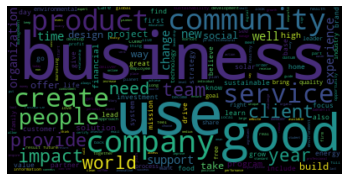

In [ ]:
# Create and generate a word cloud image:

wordcloud = WordCloud().generate_from_frequencies(data_WC)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_data['industry'].value_counts()

Food & Beverage                        148
IT Software & Services/Web Design       91
Marketing & Communications Services     85
Other                                   71
Home & Personal Care                    66
                                      ... 
Other Business Products                  1
Other Energy Generation                  1
Consumer Rewards                         1
Catering & Meeting/Event Management      1
Energy Efficiency & Consulting           1
Name: industry, Length: 65, dtype: int64

---
Below, we show the wordcloud considering a specific sector.

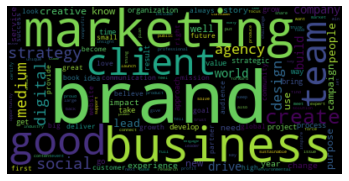

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['industry'] == 'Marketing & Communications Services'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
And then by state

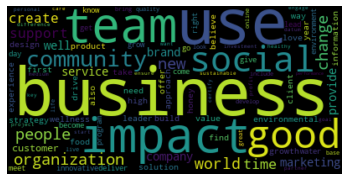

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['state'] == 'Ontario'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
The following chunks of codes create a descriptive graph of the number of words on web pages according to the different categories examinded.   

In [ ]:
# Creating a new column 'number_words_webpages' with the number of words for each article generated with the "apply" function apply the len to all the column   
df_data['number_words_webpages'] = df_data["text_cleaned"].apply(len)
# Setting the parameters of the graph that we will plot below
for sector in df_data.sector.unique():
  # Create a subset with the different sectors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset['number_words_webpages'],
               hist=False,# Boolean value to plot a (normed) histogram.
               kde=True, # Boolean value to plot a gaussian kernel density estimate
               kde_kws={'linewidth': 3},
               label=sector)
  # sns.set(xlim=(-10, 1500))
# Plot the graph with the distribution of the number of words for each webpages in the different sectors
plt.legend(prop={'size': 9}, title='Sector')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.gcf().set_size_inches(8, 6)
plt.show()

In [ ]:
#Selecting the industry sector to examinate
lst_env_sector=["Service with Minor Environmental Footprint", "Service with Significant Environmental Footprint"]
######Setting the parameters of the graph to plot
for sector in lst_env_sector:
  # Create a subset with the two sectors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset['number_words_webpages'], hist=False, kde=True, kde_kws={'linewidth': 3}, label=sector)
  # sns.set(xlim=(-10, 1500))
##Plotting the graph of the two industry sector under exam
plt.legend(prop={'size': 9}, title='Sector')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
#plt.figure(figsize=()) # figsize(float, float), default: rcParams["figure.figsize"] (default: [6.4, 4.8])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


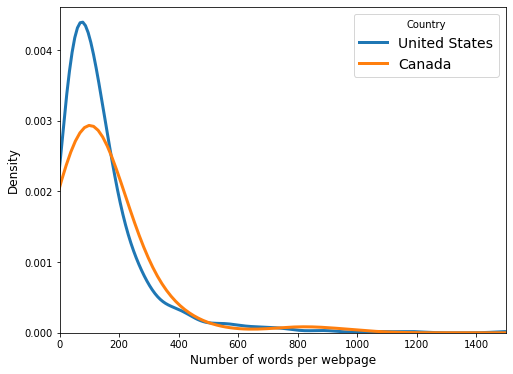

In [ ]:
#Selecting the sector to represent in the plot
data_MEF=df_data[df_data['sector']=="Service with Minor Environmental Footprint"]

for country in data_MEF.country.unique():
  # Create a subset with the different country
  subset = data_MEF[data_MEF.country == country]
  sns.distplot(subset['number_words_webpages'], hist=False, kde=True, kde_kws={'linewidth': 3}, label=country)
  # sns.set(xlim=(-10, 1500))
#Plot the graph highlighting the differences between the countries of the selected sector
plt.legend(prop={'size': 14}, title='Country')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.gcf().set_size_inches(8, 6)
plt.show()

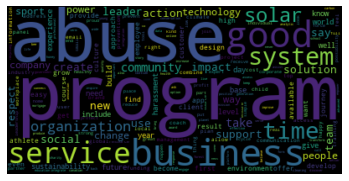

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['state'] == 'Alberta'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id="analysis"></a>
# Section 3: Analysis 

In this section, you will analyze 

In [ ]:
tfidf_DTM

<1110x2987 sparse matrix of type '<class 'numpy.float64'>'
	with 91115 stored elements in Compressed Sparse Row format>

In [ ]:
cls_kmeans = Clustering_kmeans(tfidf_DTM,
                               reduce_lsa = True,
                               n_comp_lsa= 300,
                               n_clusters = 20,#
                               random_state = 8426, #123#96#231
                               max_iter = 1000,
                               n_init = 100,
                               tol = 0.0001,
                               init = "k-means++")

Explained variance of the SVD step: 74%
For n_clusters = 20;	 The silhouette_avg is : 0.0303365


In [ ]:
# Count the Number of Occurrences in a Python list using Counter
from collections import Counter
Counter(cls_kmeans.labels_)

Counter({0: 66,
         1: 49,
         2: 98,
         3: 40,
         4: 66,
         5: 27,
         6: 68,
         7: 30,
         8: 24,
         9: 63,
         10: 19,
         11: 19,
         12: 67,
         13: 27,
         14: 23,
         15: 42,
         16: 38,
         17: 239,
         18: 34,
         19: 71})

## 3.x Plot data grouped by clusters

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1110 samples in 0.003s...
[t-SNE] Computed neighbors for 1110 samples in 0.473s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1110
[t-SNE] Computed conditional probabilities for sample 1110 / 1110
[t-SNE] Mean sigma: 0.186202
[t-SNE] KL divergence after 50 iterations with early exaggeration: 70.276031
[t-SNE] KL divergence after 1000 iterations: 1.726095
t-SNE done! Time elapsed: 12.412808179855347 seconds


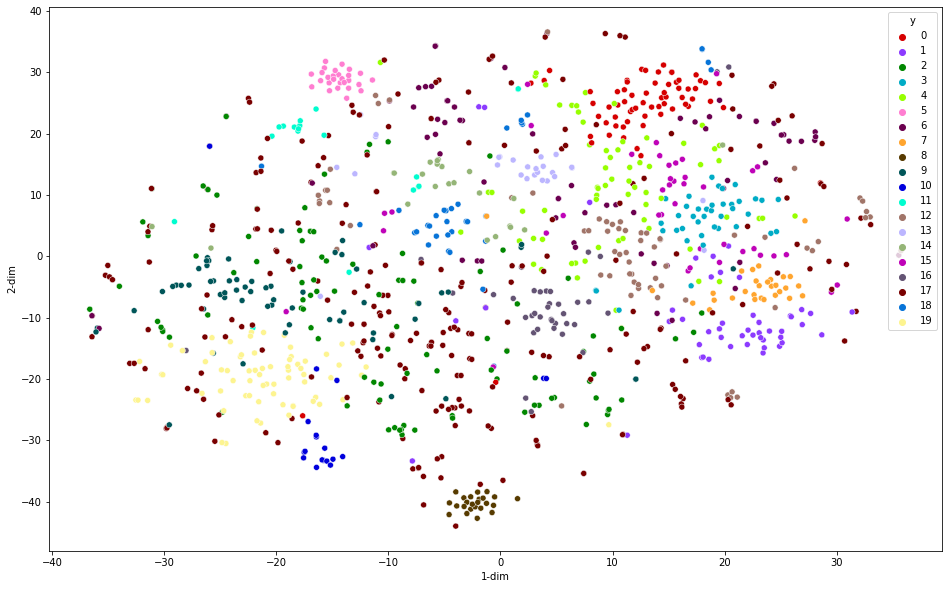

In [ ]:
plot_data_by_cluster(tfidf_DTM, cls_kmeans)

## 3.x Wordcloud by cluster

We use Tf-IDF weights

In [ ]:
wordcloud_par_cluster(WordCloud(), # 
                      tfidf_DTM,
                      cls_kmeans,
                      vectorized.vocabulary_, # 
                      first_n_words=10,
                      figsize=(12, 10),
                      fontsize=32,
                      plot_wordcloud = False,
                      lst_clust = [],
                      title_in_plot = "Clust_")

Most frequent words for cluster 0 of size 66 docs:  ['investment', 'financial', 'investor', 'client', 'value', 'management', 'invest', 'firm', 'investing', 'service']
Most frequent words for cluster 1 of size 49 docs:  ['brand', 'agency', 'people', 'build', 'story', 'business', 'creative', 'organization', 'world', 'client']
Most frequent words for cluster 2 of size 98 docs:  ['wine', 'water', 'people', 'product', 'use', 'world', 'good', 'year', 'plastic', 'experience']
Most frequent words for cluster 3 of size 40 docs:  ['leader', 'leadership', 'organization', 'business', 'people', 'team', 'change', 'development', 'lead', 'coach']
Most frequent words for cluster 4 of size 66 docs:  ['impact', 'community', 'organization', 'program', 'business', 'company', 'create', 'solution', 'diversity', 'learn']
Most frequent words for cluster 5 of size 27 docs:  ['solar', 'energy', 'installation', 'panel', 'system', 'home', 'power', 'customer', 'renewable', 'clean']
Most frequent words for cluster 6

## 3.x Statistics for Lexical Keyness


A complemtary analysis of the sum of Tf-IDF weigths is <font color='f28c00'>keyness</font>.  This analysis gives the statistical significance of a keyword's frequency in a given corpus, relative to a reference corpus.

In our case, we compare all the words of the documents of a cluster against the other docuemnts of the corpus. The Log-likelihood Ratio return the lexical specificity of the word for the target cluster. 

Keyness is generally sensible to low frequency. For this reason we can also sort Log-likelihood Ratio after having removed low frequent words.

A short description of the method is accesible [here](https://alvinntnu.github.io/NTNU_ENC2036_LECTURES/keyword-analysis.html#statistics-for-keyness).

---
Keyness is generally sensible to low frequency. 

In [ ]:
df_keyness = lexical_keyness(freq_term_DTM, cls_kmeans, 13)+
df_keyness[df_keyness['tot']>50]['Log-likelihood Ratio'].sort_values(ascending=False)

gift           3.656354
shipping       2.648807
tree           2.511303
beautiful      2.511303
store          2.352105
                ...    
portfolio    -25.959424
solve        -25.959424
range        -26.005228
indigenous   -26.020178
student      -26.696390
Name: Log-likelihood Ratio, Length: 632, dtype: float64

In [ ]:
from scipy.stats import chi2_contingency

# obs = np.array([[10, 10, 20], [20, 20, 20]])
obs = np.array([df_freq_target['freq1'],df_freq_target['freq2']]).reshape(2987,2)
# df_freq_target['freq1'] 
obs.shape
chi2_contingency(obs)
# chi2_contingency(freq_term_DTM[:,1])
# freq_term_DTM[:,[1,2]]
# tfidf_DTM[:,[1,2]]
# type(freq_term_DTM)

# freq_term_DTM[:,[1]]
# freq_term_DTM[cls_kmeans.labels_ == 7][:,[464]]

# list_mots = sorted(vectorized.vocabulary_.items(), key= lambda x:x[1])

(65656.47765994887, 0.0, 2986, array([[ 1.53863804,  1.46136196],
        [ 1.5386381 ,  1.461362  ],
        [ 1.53863804,  1.46136196],
        ...,
        [15.38638044, 14.61361956],
        [38.4659511 , 36.5340489 ],
        [10.25758696,  9.74241304]]))

In [ ]:
list_mots = sorted(vectorized.vocabulary_.items(), key= lambda x:x[1])
[(word,idx) for (word,idx) in  list_mots if word == 'coffee']    

[word for (word,idx) in sorted(vectorized.vocabulary_.items(), key= lambda x:x[1])]

## 3.x Cross-Analysis of the cluster results with the metadata

In [ ]:
df_data['cluster_labels'] = cls_kmeans.labels_

---
The following chunk of code calculate the mean of the overall score of a specific cluster of document

In [ ]:
df_data.loc[cls_kmeans.labels_== c_t_, 'overall_score'].mean()

95.20845070422534

---
The chunk of code below creates a box plot based on the overall score for each cluster

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


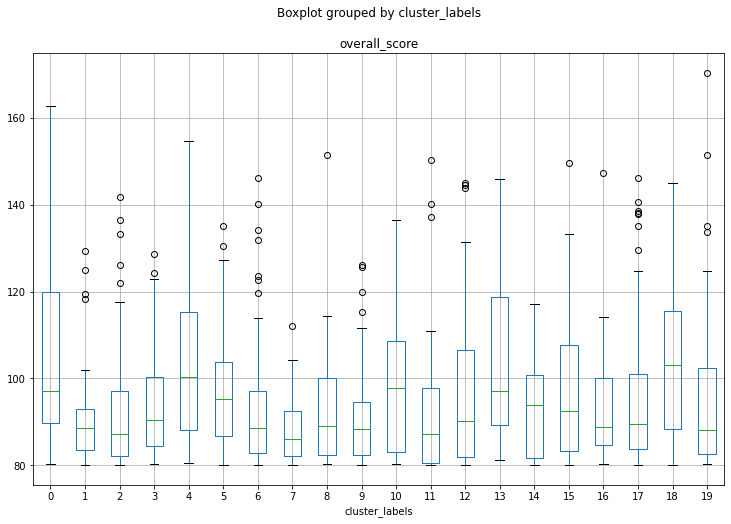

In [ ]:
df_data.boxplot('overall_score', by='cluster_labels', figsize=(12, 8))

---
In the next chunk of code, we create a box plot for each sector based onthe overall score

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


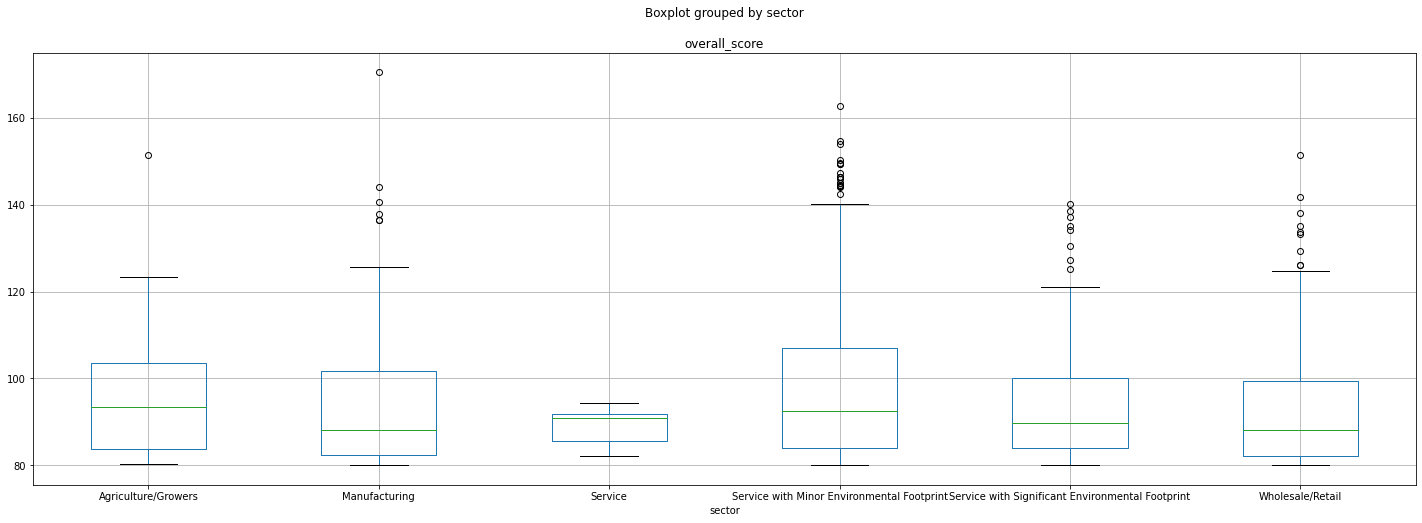

In [ ]:
df_data.boxplot('overall_score', by='sector', figsize=(24, 8))

---
Then, we calculate the mean of the overall score for each cluster of companies

In [ ]:
df_data[['cluster_labels','overall_score']].groupby('cluster_labels').mean()#['overall_score'].sort_values()

,overall_score
cluster_labels,
0,105.198485
1,90.924490
2,92.076531
3,95.505000
4,103.403030
5,98.662963
6,93.814706
7,89.036667
8,93.812500


In [ ]:
df_data[['cluster_labels','overall_score']].groupby('cluster_labels').median()#['overall_score'].sort_values()

,overall_score
cluster_labels,
0,97.20
1,88.60
2,87.30
3,90.50
4,100.30
5,95.20
6,88.60
7,85.95
8,89.10


Ratio for nominal metadata

In [ ]:
nominal_metadata_to_analyse = 'sector'
df_test = pd.DataFrame(columns=set(df_data[nominal_metadata_to_analyse])) 
for c_t_ in range(cls_kmeans.n_clusters):
    df_test.loc[c_t_] = df_data.loc[cls_kmeans.labels_== c_t_, nominal_metadata_to_analyse].value_counts()
df_test = df_test.fillna(0)
#
# Ratio
for col in df_test.columns:
    df_test[col] = df_test[col] / df_test[col].sum() * 100

df_test = df_test.round(2)
# df_test.apply(sum)
df_test

,Service with Significant Environmental Footprint,Agriculture/Growers,Service with Minor Environmental Footprint,Wholesale/Retail,Service,Manufacturing
0,2.02,0.00,10.56,0.00,0.0,0.00
1,0.00,0.00,6.77,1.80,40.0,1.35
2,12.12,20.00,3.47,19.82,0.0,10.14
3,1.01,0.00,6.44,0.00,0.0,0.00
4,6.06,0.00,9.41,0.45,40.0,0.00
5,25.25,0.00,0.33,0.00,0.0,0.00
6,9.09,0.00,9.41,0.45,0.0,0.68
7,0.00,0.00,4.95,0.00,0.0,0.00
8,1.01,13.33,0.00,1.35,0.0,10.81
9,0.00,6.67,0.83,16.67,0.0,12.84


In [ ]:
df_test

,Service with Significant Environmental Footprint,Agriculture/Growers,Service with Minor Environmental Footprint,Wholesale/Retail,Service,Manufacturing
0,2.0,3.0,0.0,1.0,0.0,13.0
1,2.0,3.0,0.0,1.0,0.0,13.0
2,2.0,3.0,0.0,1.0,0.0,13.0
3,2.0,3.0,0.0,1.0,0.0,13.0
4,2.0,3.0,0.0,1.0,0.0,13.0
5,2.0,3.0,0.0,1.0,0.0,13.0
6,2.0,3.0,0.0,1.0,0.0,13.0
7,2.0,3.0,0.0,1.0,0.0,13.0
8,2.0,3.0,0.0,1.0,0.0,13.0
9,2.0,3.0,0.0,1.0,0.0,13.0


# Section 4: Exercices

4.1 

4.2 

4.3 clustering 

4.3.1 modify k

4.3.2 do a clustering on a subset

4.4 clustering on dexceription metadata

In [ ]:
df_data.description

0       The UN's Sustainable Development Goals (SDGs) ...
1       1908 Brands, Inc. was founded in 2010 by Steve...
2       //3877 is a boutique design firm focused on hi...
3       3Degrees makes it possible for businesses and ...
4       3D Planeta is the earth intelligence company. ...
                              ...                        
1105    Zenith Commissioning envisions a world where a...
1106    Zeus Jones is a design and innovation company ...
1107    Zevin Asset Management is a majority women-own...
1108    ZG Communications is a boutique marketing agen...
1109    With a focus on building community through rea...
Name: description, Length: 1110, dtype: object